In [40]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import minmax_scale

from sklearn.multioutput import MultiOutputRegressor

import matplotlib.pyplot as plt

In [41]:
# #PATH
path_info = "F:/178/Tugas Akhir/dataset/annotations/"
path_to_fitur = "F:/178/Tugas Akhir/dataset/coba fitur/"
path_to_experiment ="F:/178/Tugas Akhir/dataset/experiment/"
path_to_model = "F:/178/Tugas Akhir/dataset/model/"
path_to_predict = "F:/178/Tugas Akhir/dataset/predict/"

In [42]:
def load(fitur):
    data = pd.read_csv(path_to_experiment + fitur+".csv",header=None)
    ground = pd.read_csv(path_info + "static_annotations.csv")

    arousal_mean = ground['mean_arousal']
    valence_mean = ground['mean_valence']
    
    return data,arousal_mean,valence_mean

def split(data,value):
    train_data, test_data, train_values, test_values = train_test_split(data,value,test_size=0.3,random_state=1000)
    
    return train_data, test_data, train_values, test_values

In [43]:
kernels = RationalQuadratic(length_scale=1.0, alpha=1.0, 
                            length_scale_bounds=(1e-6, 1e6), 
                            alpha_bounds=(1e-6, 1e6))

In [44]:
datafitur = "case1_mfcc" #CASE 1

data,arousal_mean,valence_mean = load(datafitur) #Load
scaled_ar = minmax_scale(arousal_mean.values,feature_range=(-1, 1))
scaled_val = minmax_scale(valence_mean.values,feature_range=(-1, 1))
target = [scaled_ar,scaled_val]
target = np.array(target).T
# print(target.shape)

#split arousal
train_data, test_data, train_values, test_values = split(data,target)
print(train_data.shape)

(520, 26)


In [45]:
gpr = GPR(kernel=kernels, alpha=1e-10, 
            optimizer='fmin_l_bfgs_b', 
            n_restarts_optimizer=10, 
            normalize_y=True, copy_X_train=False, 
            random_state=1000) #init Arousal

In [46]:
regr_multirf = MultiOutputRegressor(estimator=gpr, n_jobs=10)
regr_multirf.fit(train_data, train_values)


MultiOutputRegressor(estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=False,
             kernel=RationalQuadratic(alpha=1, length_scale=1),
             n_restarts_optimizer=10, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=1000),
           n_jobs=10)

In [69]:
y_multirf = regr_multirf.predict(test_data)

In [76]:
np.shape(y_multirf)

(224, 2)

In [77]:
np.shape(test_values)

(224, 2)

In [78]:
regr_multirf.score(test_data,test_values)

0.46533614011951618

In [61]:
np.shape(list(zip(*y_multirf.tolist())))

(224, 2)

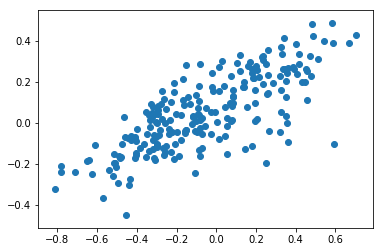

In [64]:
# plt.scatter(x=y_multirf[0].tolist(),y=y_multirf[1].tolist())
# plt.show()
x = list(zip(*y_multirf.tolist()))
plt.scatter(x[0],x[1])
plt.show()

In [79]:
y_multirf

array([[-0.08823784,  0.17934649],
       [ 0.23558032,  0.32411901],
       [ 0.58498194,  0.48597643],
       [-0.40538425, -0.14541304],
       [-0.41013923, -0.06815545],
       [-0.0869154 ,  0.10626381],
       [-0.80990124, -0.32171568],
       [ 0.26100173,  0.23246933],
       [-0.44363132, -0.0743312 ],
       [-0.09155601,  0.04481799],
       [-0.51472175, -0.15033169],
       [-0.51912051, -0.25820383],
       [-0.50488757, -0.21483669],
       [-0.0831111 ,  0.01583043],
       [-0.51566142, -0.19307216],
       [-0.0712653 , -0.05444195],
       [ 0.04485414,  0.07628228],
       [ 0.01425914,  0.15400837],
       [-0.20331382,  0.04286848],
       [-0.31111961, -0.17049052],
       [-0.15193582, -0.03598706],
       [-0.02159772,  0.17511318],
       [ 0.08619592,  0.1251353 ],
       [ 0.08264238,  0.09884585],
       [-0.21221219,  0.19607677],
       [ 0.48224446,  0.48311467],
       [-0.27677171,  0.09079591],
       [-0.2055665 , -0.10467329],
       [ 0.14037667,